In [1]:
import pandas as pd
import pandas_datareader as pdr

In [2]:
nvda = pdr.get_data_yahoo('NVDA', '20181231')

In [3]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2018-12-31 to 2020-01-16
Data columns (total 6 columns):
High         264 non-null float64
Low          264 non-null float64
Open         264 non-null float64
Close        264 non-null float64
Volume       264 non-null float64
Adj Close    264 non-null float64
dtypes: float64(6)
memory usage: 14.4 KB


In [4]:
# drop unwanted column if try to run cell more than once keyerror
nvda.drop(columns=['Adj Close'], inplace=True)

In [5]:
nvda = round(nvda,2)
nvda['Change'] = nvda['Close'] - nvda['Close'].shift(1)
nvda.head()

,High,Low,Open,Close,Volume,Change
Date,,,,,,
2018-12-31,136.71,132.26,135.40,133.50,11628500.0,NaN
2019-01-02,138.48,130.05,130.64,136.22,12718800.0,2.72
2019-01-03,135.16,127.69,133.79,127.99,17638800.0,-8.23
2019-01-04,137.73,129.70,130.94,136.19,14640500.0,8.20
2019-01-07,144.89,136.43,138.50,143.40,17729000.0,7.21


In [6]:
import numpy as np

In [7]:
nvda['Return'] = np.log(nvda['Close']).diff()
nvda.head()

,High,Low,Open,Close,Volume,Change,Return
Date,,,,,,,
2018-12-31,136.71,132.26,135.40,133.50,11628500.0,NaN,NaN
2019-01-02,138.48,130.05,130.64,136.22,12718800.0,2.72,0.020170
2019-01-03,135.16,127.69,133.79,127.99,17638800.0,-8.23,-0.062319
2019-01-04,137.73,129.70,130.94,136.19,14640500.0,8.20,0.062099
2019-01-07,144.89,136.43,138.50,143.40,17729000.0,7.21,0.051587


In [8]:
nvda['Close'].pct_change()

Date
2018-12-31         NaN
2019-01-02    0.020375
2019-01-03   -0.060417
2019-01-04    0.064068
2019-01-07    0.052941
                ...   
2020-01-10    0.005349
2020-01-13    0.031352
2020-01-14   -0.018652
2020-01-15   -0.006915
2020-01-16    0.008511
Name: Close, Length: 264, dtype: float64

In [14]:
nvda['Volatility'] = nvda['Return'].rolling(21).std().shift(1)
nvda.head(10)

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,
2019-01-09,144.49,139.86,141.90,142.58,15431500.0,2.75,0.019476,NaN,7.481823,0.367557
2019-01-10,145.58,139.36,141.80,145.23,13078900.0,2.65,0.018415,NaN,7.615777,0.347962
2019-01-11,149.75,143.21,144.33,148.83,21869100.0,3.60,0.024486,NaN,5.089565,0.707330
2019-01-14,151.46,145.77,146.72,150.44,18254200.0,1.61,0.010760,NaN,4.146896,0.388242
2019-01-15,153.35,149.13,151.76,149.87,15425300.0,-0.57,-0.003796,NaN,3.006710,-0.189576
2019-01-16,152.30,148.62,150.97,148.84,11752600.0,-1.03,-0.006896,NaN,1.641550,-0.627456
2019-01-17,153.33,146.41,147.51,151.72,12335900.0,2.88,0.019165,NaN,2.073591,1.388895
2019-01-18,157.98,151.65,153.73,156.93,16283400.0,5.21,0.033763,NaN,2.166460,2.404844
2019-01-22,156.18,147.55,155.71,148.77,16538800.0,-8.16,-0.053398,NaN,2.493042,-3.273109


In [10]:
# cleanup missing values
nvda.dropna(inplace=True)
nvda.head()

,High,Low,Open,Close,Volume,Change,Return,Volatility
Date,,,,,,,,
2019-01-09,144.49,139.86,141.90,142.58,15431500.0,2.75,0.019476,0.052475
2019-01-10,145.58,139.36,141.80,145.23,13078900.0,2.65,0.018415,0.052439
2019-01-11,149.75,143.21,144.33,148.83,21869100.0,3.60,0.024486,0.034197
2019-01-14,151.46,145.77,146.72,150.44,18254200.0,1.61,0.010760,0.027565
2019-01-15,153.35,149.13,151.76,149.87,15425300.0,-0.57,-0.003796,0.020062


In [11]:
nvda['Exp Change'] = nvda['Volatility'] * nvda['Close']
nvda['Move Size'] = nvda['Change'] / nvda['Exp Change']
nvda.tail()

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,
2020-01-10,248.55,243.75,247.33,244.32,7907400.0,1.30,0.005335,0.011317,2.765034,0.470157
2020-01-13,252.99,246.75,247.66,251.98,7996000.0,7.66,0.030871,0.004405,1.109991,6.900957
2020-01-14,251.28,246.75,250.26,247.28,8977200.0,-4.70,-0.018828,0.011225,2.775760,-1.693230
2020-01-15,248.69,244.53,247.79,245.57,6572200.0,-1.71,-0.006939,0.017866,4.387234,-0.389767
2020-01-16,249.17,246.77,247.72,247.66,5261130.0,2.09,0.008475,0.018790,4.653413,0.449133


### Filtering or subsetting

In [16]:
nvda['20181225':]

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,
2019-01-09,144.49,139.86,141.90,142.58,15431500.0,2.75,0.019476,NaN,7.481823,0.367557
2019-01-10,145.58,139.36,141.80,145.23,13078900.0,2.65,0.018415,NaN,7.615777,0.347962
2019-01-11,149.75,143.21,144.33,148.83,21869100.0,3.60,0.024486,NaN,5.089565,0.707330
2019-01-14,151.46,145.77,146.72,150.44,18254200.0,1.61,0.010760,NaN,4.146896,0.388242
2019-01-15,153.35,149.13,151.76,149.87,15425300.0,-0.57,-0.003796,NaN,3.006710,-0.189576
...,...,...,...,...,...,...,...,...,...,...
2020-01-10,248.55,243.75,247.33,244.32,7907400.0,1.30,0.005335,0.012466,2.765034,0.470157
2020-01-13,252.99,246.75,247.66,251.98,7996000.0,7.66,0.030871,0.012459,1.109991,6.900957
2020-01-14,251.28,246.75,250.26,247.28,8977200.0,-4.70,-0.018828,0.013436,2.775760,-1.693230


,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,


In [17]:
nvda[nvda['Move Size']> 2]

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,
2019-01-18,157.98,151.65,153.73,156.93,16283400.0,5.21,0.033763,NaN,2.166460,2.404844
2019-03-11,162.06,149.69,151.59,161.14,21493200.0,10.50,0.067381,0.017046,2.532460,4.146167
2019-03-21,185.00,175.13,175.33,183.94,20607800.0,9.54,0.053258,0.023139,4.478850,2.130011
2019-04-03,191.00,184.80,185.00,188.62,19719500.0,5.62,0.030248,0.026456,1.331851,4.219691
2019-06-04,143.21,135.47,136.36,143.00,16045900.0,9.22,0.066648,0.019390,1.043688,8.834058
2019-06-18,155.11,147.06,147.50,152.88,14548000.0,7.85,0.052713,0.024589,3.320070,2.364408
2019-06-26,161.72,156.09,156.61,159.26,14601800.0,7.78,0.050084,0.024533,1.501492,5.181514
2019-07-11,167.92,161.50,163.00,166.28,17064000.0,6.22,0.038124,0.021973,2.466739,2.521547
2019-07-23,175.74,172.27,172.90,175.66,10704400.0,4.34,0.025017,0.018363,2.024752,2.143472


In [18]:
len(nvda[nvda['Move Size']> 2])

21

In [19]:
len(nvda)

258

In [22]:
big_move = nvda[(nvda['Move Size']> 2) | (nvda['Move Size']< -2) ]
len(big_move)

41

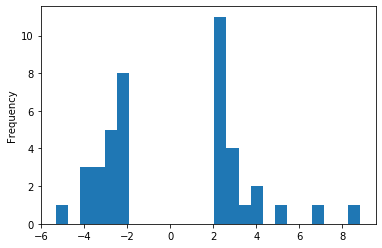

In [24]:
big_move['Move Size'].plot(kind='hist',bins=25)

In [25]:
nvda[['Close', 'Change', 'Exp Change', 'Return']].head()

,Close,Change,Exp Change,Return
Date,,,,
2019-01-09,142.58,2.75,7.481823,0.019476
2019-01-10,145.23,2.65,7.615777,0.018415
2019-01-11,148.83,3.60,5.089565,0.024486
2019-01-14,150.44,1.61,4.146896,0.010760
2019-01-15,149.87,-0.57,3.006710,-0.003796


In [26]:
nvda['Volume'].describe()

count    2.580000e+02
mean     1.111878e+07
std      5.860241e+06
min      3.471600e+06
25%      7.704200e+06
50%      9.863900e+06
75%      1.275828e+07
max      6.278820e+07
Name: Volume, dtype: float64

In [27]:
nvda[nvda.Volume > nvda.Volume.mean() + 2 * nvda.Volume.std()]

,High,Low,Open,Close,Volume,Change,Return,Volatility,Exp Change,Move Size
Date,,,,,,,,,,
2019-01-25,160.88,151.30,155.44,160.15,28864300.0,2.31,0.014529,NaN,6.594860,0.350273
2019-01-28,141.64,131.00,136.55,138.01,62788200.0,-22.14,-0.148785,NaN,5.661481,-3.910638
2019-01-29,138.10,131.01,136.15,131.60,28848300.0,-6.41,-0.047559,NaN,10.406380,-0.615968
2019-01-30,137.97,131.46,134.67,137.39,24355700.0,5.79,0.043057,NaN,10.799696,0.536126
2019-02-15,163.87,156.42,162.95,157.34,37918700.0,2.81,0.018021,0.044818,2.445531,1.149035
2019-05-17,163.71,154.94,158.50,156.53,25551700.0,-3.66,-0.023113,0.021669,5.012180,-0.730221
2019-08-16,161.54,156.88,159.35,159.56,25199000.0,10.79,0.070019,0.025502,4.171773,2.586431
2019-11-15,211.78,200.64,209.70,204.19,26340700.0,-5.60,-0.027056,0.015519,1.055785,-5.304110
